In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import gdown
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/CSCI5609 - Heart Disease Project/Cleaned data/transformed_heart_data_to_numerical.csv'

In [4]:
full_df = pd.read_csv(path)

In [5]:
full_df.columns

Index(['State', 'Sex', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadCOPD', 'HadDepressiveDisorder', 'HadDiabetes',
       'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'CovidPos'],
      dtype='object')

In [6]:
state = full_df.groupby('State')
print(state)

In [7]:
# Aggregate by state and count how many rows for each state
state_count = state.count()
state_counts = state_count['Sex']
state_counts
print(state_count['Sex'])

State
Alabama                  3713
Alaska                   4468
Arizona                  7559
Arkansas                 3880
California               7591
Colorado                 7222
Connecticut              6839
Delaware                 2947
District of Columbia     2359
Florida                  9737
Georgia                  6639
Guam                     1822
Hawaii                   6576
Idaho                    5013
Illinois                 3264
Indiana                  7372
Iowa                     7262
Kansas                   8877
Kentucky                 3285
Louisiana                4290
Maine                    8630
Maryland                11923
Massachusetts            8254
Michigan                 7329
Minnesota               12732
Mississippi              3402
Missouri                 5997
Montana                  5838
Nebraska                 6183
Nevada                   2401
New Hampshire            5024
New Jersey               5479
New Mexico               3890
New 

In [8]:
full_df['Heart disease'] = full_df[['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD']].any(axis=1).astype(int)

In [9]:
full_df.head()

,State,Sex,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos,Heart disease
0,Alabama,0,6.0,0,0,0,0,0,0,0,0,0,12,1.60,68.04,26.57,0,0,0
1,Alabama,0,5.0,0,0,0,0,0,0,0,0,0,7,1.57,63.50,25.61,0,1,0
2,Alabama,0,9.0,0,0,0,0,0,0,0,0,0,4,1.57,53.98,21.77,1,0,0
3,Alabama,1,7.0,1,0,1,0,0,1,0,0,0,12,1.80,84.82,26.08,0,0,1
4,Alabama,0,7.0,0,0,0,0,0,0,1,0,1,12,1.65,62.60,22.96,1,0,0


In [10]:
processed_data_chunks = []
print("Initialized an empty list 'processed_data_chunks'.")

Initialized an empty list 'processed_data_chunks'.


In [11]:
for state in full_df['State'].unique():
    state_df = full_df[full_df['State'] == state]
    if len(state_df) < 2000:
        processed_data_chunks.append(state_df)
    else:
        sampled_df = state_df.sample(n=2000, random_state=42)
        processed_data_chunks.append(sampled_df)

print(f"Processed data for {len(full_df['State'].unique())} states.")

Processed data for 54 states.


**Reasoning**:
Now that all state dataframes have been processed and stored in `processed_data_chunks`, the next step is to combine them into a single DataFrame named `subset_df` as specified in the main task.



In [12]:
subset_df = pd.concat(processed_data_chunks, ignore_index=True)
print(f"Combined {len(processed_data_chunks)} data chunks into a single DataFrame with {len(subset_df)} rows.")
subset_df.head()

Combined 54 data chunks into a single DataFrame with 106926 rows.


,State,Sex,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos,Heart disease
0,Alabama,0,7.0,0,0,0,0,0,0,0,0,0,6,1.70,77.11,26.63,1,0,0
1,Alabama,0,5.0,0,1,0,1,0,1,0,0,1,8,1.65,88.90,32.62,0,1,1
2,Alabama,0,8.0,0,0,0,0,1,0,1,1,0,9,1.63,79.38,30.04,0,1,0
3,Alabama,1,5.0,0,0,0,0,0,0,0,0,1,2,1.73,90.72,30.41,0,1,0
4,Alabama,1,7.0,0,0,0,0,0,0,0,0,0,2,1.78,70.31,22.24,0,1,0


In [13]:
subset_df = subset_df[(subset_df['State'] != 'Guam') & (subset_df['State'] != 'Virgin Islands')]
print(f"Filtered out Guam and Virgin Islands. New DataFrame has {len(subset_df)} rows.")

Filtered out Guam and Virgin Islands. New DataFrame has 104000 rows.


In [14]:
subset_df.to_csv('subset_transformed_heart_data.csv')

In [15]:
# Look at distribution of inidividuals with heart disease per state
state_heart_disease_counts = subset_df.groupby('State')['Heart disease'].sum()
print(state_heart_disease_counts)

State
Alabama                 450
Alaska                  295
Arizona                 397
Arkansas                497
California              225
Colorado                238
Connecticut             293
Delaware                378
District of Columbia    211
Florida                 483
Georgia                 410
Hawaii                  288
Idaho                   312
Illinois                264
Indiana                 361
Iowa                    315
Kansas                  325
Kentucky                465
Louisiana               421
Maine                   394
Maryland                326
Massachusetts           262
Michigan                400
Minnesota               268
Mississippi             365
Missouri                400
Montana                 327
Nebraska                360
Nevada                  367
New Hampshire           371
New Jersey              254
New Mexico              340
New York                283
North Carolina          320
North Dakota            315
Ohio          

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Age, BMI, depression, diabetes, COVID, heart disease

In [21]:
subset_df.rename(columns={"AgeCategory": "Age"})

,State,Sex,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,Age,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos,Heart disease
0,Alabama,0,7.0,0,0,0,0,0,0,0,0,0,6,1.70,77.11,26.63,1,0,0
1,Alabama,0,5.0,0,1,0,1,0,1,0,0,1,8,1.65,88.90,32.62,0,1,1
2,Alabama,0,8.0,0,0,0,0,1,0,1,1,0,9,1.63,79.38,30.04,0,1,0
3,Alabama,1,5.0,0,0,0,0,0,0,0,0,1,2,1.73,90.72,30.41,0,1,0
4,Alabama,1,7.0,0,0,0,0,0,0,0,0,0,2,1.78,70.31,22.24,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105817,Puerto Rico,1,6.0,0,0,0,0,0,0,0,0,4,3,1.75,86.18,28.06,0,1,0
105818,Puerto Rico,0,8.0,0,0,0,0,0,0,0,0,4,0,1.50,80.29,35.75,1,0,0
105819,Puerto Rico,1,7.0,0,0,0,0,0,0,0,0,4,1,1.75,92.99,30.27,1,1,0
105820,Puerto Rico,1,8.0,0,0,0,0,0,0,1,1,4,3,1.91,176.45,48.62,0,0,0


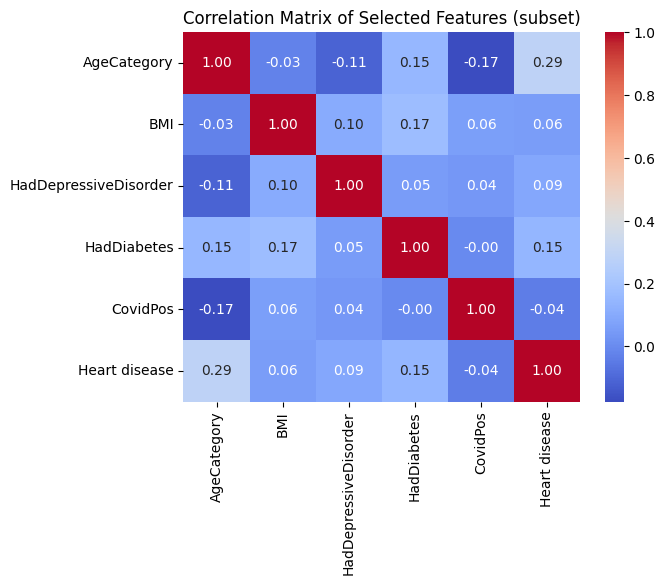

In [23]:
# Age, BMI, depression, diabetes, COVID, heart disease
columns_to_correlate = ['AgeCategory', 'BMI', 'HadDepressiveDisorder', 'HadDiabetes', 'CovidPos', 'Heart disease']
sns.heatmap(subset_df[columns_to_correlate].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features (subset)')
plt.show()

In [24]:
subset_df[columns_to_correlate].corr()

,AgeCategory,BMI,HadDepressiveDisorder,HadDiabetes,CovidPos,Heart disease
AgeCategory,1.000000,-0.026596,-0.114859,0.147451,-0.174950,0.287559
BMI,-0.026596,1.000000,0.103362,0.171439,0.063094,0.055309
HadDepressiveDisorder,-0.114859,0.103362,1.000000,0.051338,0.040540,0.089250
HadDiabetes,0.147451,0.171439,0.051338,1.000000,-0.003036,0.145988
CovidPos,-0.174950,0.063094,0.040540,-0.003036,1.000000,-0.037894
Heart disease,0.287559,0.055309,0.089250,0.145988,-0.037894,1.000000


In [ ]:
corr_df = full_df[columns_to_correlate].corr()
# Save as csv
corr_df.to_csv('correlation_matrix.csv')

In [ ]:
sns.heatmap(full_df[columns_to_correlate].corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
from re import X
# Linear regression model
# Import linear reg from scikit
# Import train test split
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
X = full_df[columns_to_correlate].drop('Heart disease', axis=1)
y = full_df['Heart disease']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred.round())
accuracy = accuracy_score(y_test, y_pred.round())
print(conf_mat)
print(accuracy)

In [ ]:
# Create a catboost model
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=100)

# With all factors
X = full_df[['Sex', 'SleepHours', 'HadDepressiveDisorder', 'HadDiabetes',
       'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'CovidPos']]
y = full_df['Heart disease']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_model.fit(x_train, y_train)
y_pred = cat_model.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(conf_mat)
print(accuracy)

In [ ]:
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': cat_model.feature_importances_})
importances_df